<a href="https://www.kaggle.com/code/emrecavdar1565/happiness?scriptVersionId=108890869" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization library
import seaborn as sns # visualization tool

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


In [2]:
df = pd.read_csv('/kaggle/input/world-happiness/2015.csv')
df.head() # gives first 5 rows of our data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.info() # returns information about our dataframe like data types, memory usage and rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
df.corr() # like similarity sheet, thats why same values gives the maximum score

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


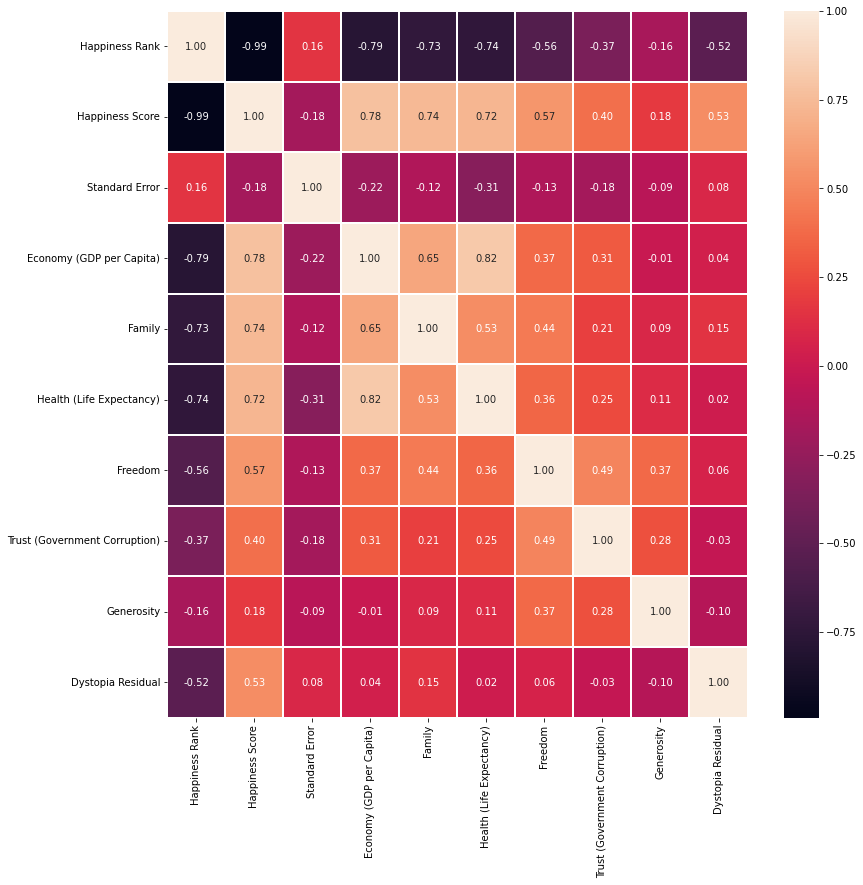

In [5]:
# correlation map with seaborn
f, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt='.2f',ax=ax)
plt.show()

In [6]:
df.head(10) # returns first 10 rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [7]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# Python Tutorial

***Matplotlib***

You can make useful graphics of your data with matplotlib.
* Line plot is good if x axis is time.
* Scatter is good when there is correlation between two variables.
* Histogram is better when we need to see distribution of numerical data.

Text(0.5, 1.0, 'Line Plot')

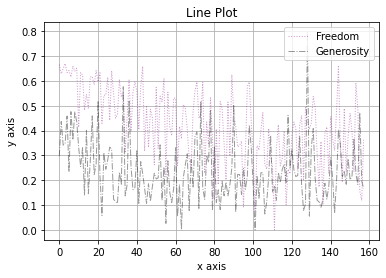

In [8]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
df.Freedom.plot(kind = 'line', color = "purple", label = 'Freedom', linewidth=1, alpha = 0.4, grid = True, linestyle = ':')
df.Generosity.plot(kind = 'line', color = "black", label = 'Generosity', linewidth=1, alpha = 0.4, grid = True, linestyle = '-.')
plt.legend(loc='upper right') # label position
plt.xlabel('x axis') # label of x axis
plt.ylabel('y axis') 
plt.title('Line Plot')

Text(0.5, 1.0, 'Freedom-enerosity Scatter Plot')

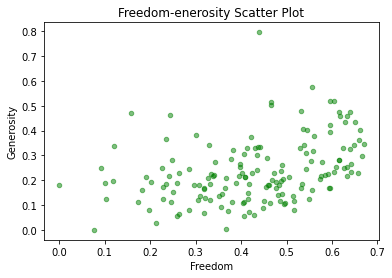

In [9]:
# Scatter Plot - good if there is a correlation between two values
# x = Freedom, y = Generosity
df.plot(kind='scatter', x="Freedom", y='Generosity', alpha=0.5, color='g') # kind for plot type, x and y values must match with the columns of the data
plt.xlabel('Freedom')
plt.ylabel('Generosity')
plt.title('Freedom-enerosity Scatter Plot')

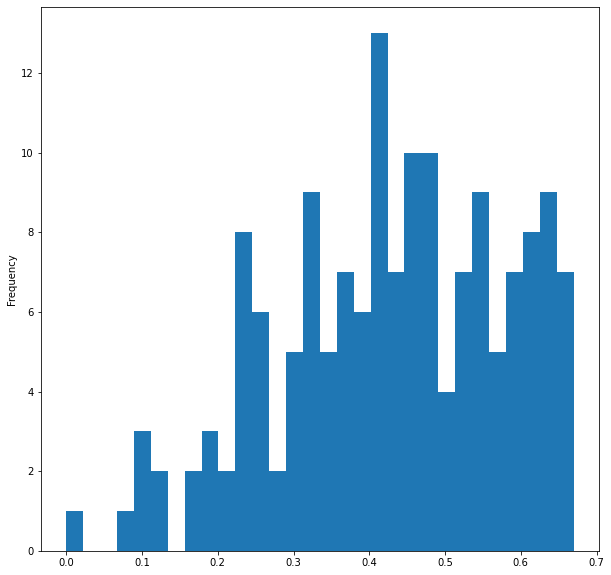

In [10]:
# Histogram
df.Freedom.plot(kind='hist', bins = 30, figsize = (10,10))  #figsize: figure size, bins: number of bars
plt.show()

In [11]:
# clf() = cleans the plots
df.Freedom.plot(kind = 'hist',bins = 10)
plt.clf()
# We cannot see plot due to clf()

<Figure size 432x288 with 0 Axes>

# Dictionary

* Key-value relationship
* Faster than lists
* dictionary = {'brazil':'rio'} for this one, key is brazil and value is rio

In [12]:
# creating dictionary and looking its keys and values
dictionary = {'norway':'oslo', 'canada':'ottava', 'uk':'manchester'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['norway', 'canada', 'uk'])
dict_values(['oslo', 'ottava', 'manchester'])


In [13]:
dictionary['uk'] = "london"    # update existing entry
print(dictionary)
dictionary['france'] = "paris"       # new entry
print(dictionary)
del dictionary['canada']              # remove entry with key 'canada'
print(dictionary)
print('usa' in dictionary)        # check include or not
dictionary.clear()                   # removes all entries
print(dictionary)

{'norway': 'oslo', 'canada': 'ottava', 'uk': 'london'}
{'norway': 'oslo', 'canada': 'ottava', 'uk': 'london', 'france': 'paris'}
{'norway': 'oslo', 'uk': 'london', 'france': 'paris'}
False
{}


In [14]:
# del dictionary         # deletes dictionary object completely     
print(dictionary)       # error - dictionary is deleted

{}


# Pandas

Pandas is a library for using our sheets with a good performance.

* CSV = comma seperated values

In [15]:
df = pd.read_csv('/kaggle/input/world-happiness/2015.csv')  # reading csv with pandas library (pd)

In [16]:
series = df['Freedom']        # data['Freedom'] = series
print(type(series))
data_frame = df[['Generosity']]  # data[['Generosity']] = data frame
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


# logic, control flow and filtering.
* Comparison operators: ==, <, >, <=
* Boolean operators: and, or ,not
* Filtering pandas

In [17]:
# Comparison operators
print(3 > 2)
print(3!=2)
# Boolean operators
print(True and False)
print(True or False)

True
True
False
True


In [18]:
# 1 - Filtering Pandas data frame
x = df['Freedom']>0.65     # There are only 6 countries who have higher freedom value than 0.65
df[x]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
43,Uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195


In [19]:
# 2 - Filtering pandas with logical_and
# There are only 8 countries who have higher freedom value than 0.6 and higher generosity value than 0.4
df[np.logical_and(df['Freedom']>0.6, df['Generosity']>0.4 )]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
17,Ireland,Western Europe,18,6.940,0.03676,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570
36,Malta,Western Europe,37,6.302,0.04206,1.20740,1.30203,0.88721,0.60365,0.13586,0.51752,1.64880
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195


In [20]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.
df[(df['Freedom']>0.6) & (df['Generosity']>0.4)]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
17,Ireland,Western Europe,18,6.940,0.03676,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570
36,Malta,Western Europe,37,6.302,0.04206,1.20740,1.30203,0.88721,0.60365,0.13586,0.51752,1.64880
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195


# WHILE and FOR LOOPS

In [21]:
# Stay in loop if condition( i is not equal 0) is true
i = 4
while i != 0 :
    print('i is: ',i)
    i -=1
print(i,'is equal to 0')

i is:  4
i is:  3
i is:  2
i is:  1
0 is equal to 0


In [22]:
# Stay in loop if condition( i is not equal 5) is true
lis = [1,2,3,4,5]
for i in lis:
    print('i is: ',i)
print('')

# Enumerate index and value of list
# index : value = 0:1, 1:2, 2:3, 3:4, 4:5
for index, value in enumerate(lis):
    print(index," : ",value)
print('')   

# For dictionaries
# We can use for loop to achive key and value of dictionary.
dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key," : ",value)
print('')

# For pandas we can achieve index and value
for index,value in df[['Freedom']][0:1].iterrows():
    print(index," : ",value)

i is:  1
i is:  2
i is:  3
i is:  4
i is:  5

0  :  1
1  :  2
2  :  3
3  :  4
4  :  5

spain  :  madrid
france  :  paris

0  :  Freedom    0.66557
Name: 0, dtype: float64


# Python Data Science Toolbox

**User Defined Function**

* docstring: documentation for functions.
for f():
"""This is docstring for documentation of function f"""

In [23]:
# example
def tuple_ex():
    """return deefined t tuple"""
    t = (1,2,3)
    return t
a,b,c = tuple_ex()
print(a,b,c)

1 2 3


**Scope**

* global: defined main body in script
* local: defined in a function
* built in scope: names in predefined built in scope module such as print, len

In [24]:
x = 3
def f():
    x = 3
    return x
print(x)      # global scope
print(f())    # local scope

3
3


In [25]:
# What if there is no local scope
x = 5
def f():
    y = 2*x   # there is no local scope x
    return y
print(f())     # it uses global scope x
# first local, then global and lastly buil in scope

10


In [26]:
# These asr buil in scopes
import builtins
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

**Nested Function**

* function inside function.
* There is a LEGB rule that is seach local scope, enclosing function, global and built in scopes.

In [27]:
#nested function
def square():
    """return square of value"""
    def add():
        """add two local variable"""
        x = 2
        y = 3
        z = x + y
        return z
    return add()**2
print(square())

25


**Default and Flexible Arguments**

* Default argument:

def f(a,b=1):
"""b = 1 is default argument"""

* Flexible argument:

def f(*args):
""" *args can be one or more"""

def f(** kwargs)
""" ** kwargs is a dictionary"""

In [28]:
# default arguments
def f(a, b = 1, c = 2):
    y = a + b + c
    return y
print(f(5))
# but we can change the values
print(f(5,4,3))

8
12


In [29]:
# flexible arguments *args
def f(*args):
    for i in args:
        print(i)
f(1)
print("")
f(1,2,3,4)

1

1
2
3
4


In [30]:
# flexible arguments **kwargs that is dictionary
def f(**kwargs):
    """print key and value of dictionary"""
    for key, value in kwargs.items():
        print(key, " ", value)
f(country = 'spain', capital = 'madrid', population = 123456)

country   spain
capital   madrid
population   123456


**Lambda Function**

In [31]:
#lambda function
square = lambda x: x**2  # where x is name of argument
print(square(4))
tot = lambda x,y,z: x+y+z
print(tot(1,2,3))

16
6


**Anonymous Function**
Like lambda but it can take more than one arguments.

* map(func,seq):applies a ffunction to all the items in a list

In [32]:
number_list = [1,2,3]
y = map(lambda x:x**2,number_list)
print(list(y))

[1, 4, 9]


**Iterators**
* iterable is an object that can return an iterator
* iterable: an object with an associated iter() method
* iterator: produces next value with next() method

In [33]:
# iteration example
name = "ronaldo"
it = iter(name)
print(next(it))    # print next iteration
print(*it)         # print remaining iteration

r
o n a l d o


In [34]:
# zip function
list1 = [1,2,3,4]
list2 = [5,6,7,8]
z = zip(list1,list2)
print(z)
z_list = list(z)
print(z_list)

[(1, 5), (2, 6), (3, 7), (4, 8)]


In [35]:
un_zip = zip(*z_list)
un_list1, un_list2 = list(un_zip)  # unzip returns tuple
print(un_list1)
print(un_list2)
print(type(un_list2))

(1, 2, 3, 4)
(5, 6, 7, 8)
<class 'tuple'>


**List Comprehension**

Collapse for loops for building lists into a single line
Ex: num1 = [1,2,3] and we want to make it num2 = [2,3,4]. This can be done with for loop. However it is unnecessarily long.

In [36]:
#Example of list comprehension
num1 = [1,2,3]
num2 = [i + 1 for i in num1]
print(num2)

[2, 3, 4]


[i + 1 for i in num1]: list of comprehension

i + 1: list comprehension syntax

for i in num1: for loop syntax

i: iterator

num1: iterable object

In [37]:
#Conditionals on iterable
num1 = [5,10,15]
num2 = [i**2 if i == 10 else i-5 if i < 7 else i+5 for i in num1]
print(num2)

[0, 100, 20]


In [38]:
# lets return to happiness csv and make one more list comprehension example
# lets classify countries whether they have high or low freedom. Our threshold is average.
threshold = sum(df.Freedom)/len(df.Freedom)
df["freedom_level"] = ["high" if i > threshold else "low" for i in df.Freedom]
df.loc[:10,["freedom_level", "Freedom"]]

,freedom_level,Freedom
0,high,0.66557
1,high,0.62877
2,high,0.64938
3,high,0.66973
4,high,0.63297
5,high,0.64169
6,high,0.61576
7,high,0.65980
8,high,0.63938
9,high,0.65124
